---
## Chap 05. Monte Carlo Method $ $

- Model Based RL
    - Dynamic Programming
    - Known Environments:
        - state transfer function : $p(s' |s, a)$ (deterministic : $s'=f(s,a)$)
        - reward function : $r(s, a, s')$
- Model Free RL
    - <font color = "red"> Monte Carlo Method </font>
        - <font color = "red"><b> Episodic Task (o) </b></font>
        - <font color = "red"> Continous Task (x)  </font>
    - UnKnown Environments:
        - Distribution Model
        - Sample Model

In [1]:
# @title Chap 05.1 : Code Implementation
import numpy as np
# Expectation number of two dices : Distribution Model
def test_51_1():
    ps = {2:1/36, 3:2/36, 4: 3/36, 5: 4/36, 6:5/36, 7:6/36, 8:5/36, 9:4/36, 10:3/36, 11:2/36, 12:1/36}
    V = 0
    for x, p in ps.items():
        V += x*p
    print("\ntest_51_1")
    print(V)

# Sampling : Sample Model
def dice_sample(dices = 2):
    x = 0
    for _ in range(dices):
        # x += np.random.randint(1, 7)
        x += np.random.choice([1, 2, 3, 4, 5, 6])
    return x

def test_51_2(num_dices = 2):
    print("\ntest_51_2")
    print(f"{num_dices} dices generate {dice_sample(num_dices)}")
    print(f"{num_dices} dices generate {dice_sample(num_dices)}")
    print(f"{num_dices} dices generate {dice_sample(num_dices)}")

# Simple Example for Monte Carlo Method
def test_51_3(trial = 1000): # the number sampling
    V_inc, n = 0, 0
    samples = []
    for _ in range(trial):
        s = dice_sample()
        samples.append(s)
        n += 1
        V_inc = V_inc + (s - V_inc)/n
    V_nav  = sum(samples)/ len(samples)
    print("\ntest_51_3 : Monte Carlo Method")
    print(f"The expecation number of dice (Navi): {V_nav} with {trial} trials")
    print(f"The expecation number of dice (Increment): {V_inc} with {n} trials")


if __name__ == "__main__":
    test_51_1()
    test_51_2()
    test_51_3()




test_51_1
6.999999999999999

test_51_2
2 dices generate 2
2 dices generate 10
2 dices generate 6

test_51_3 : Monte Carlo Method
The expecation number of dice (Navi): 6.942 with 1000 trials
The expecation number of dice (Increment): 6.941999999999995 with 1000 trials


----
### Chap 05.2. Policy Evaluation with Monte Carlo Method $ $

- Given Equation:
    - $G_{A} = R_0 + \gamma R_1 + \gamma^2 R_2$
    - $G_{B} = R_1 + \gamma R_2$
    - $G_{C} = R_2$

- Approach:
    - $G_{C} = R_2$
    - $G_{B} = R_1 + \gamma G_{C}$
    - $G_{A} = R_0 + \gamma G_{B}$


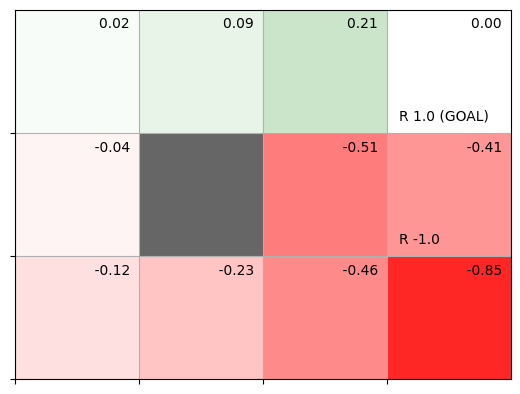

In [2]:
# @title Chap 05.3. Code Implemetation: Monte Carlo Method - Policy Evaluation
from common.gridworld import GridWorld
from collections import defaultdict
import numpy as np

def test_531():
    env = GridWorld()
    action = 0
    next_state, reward, done = env.step(action)

    print(f"next_state : {next_state}")
    print(f"reward : {reward}")
    print(f"done : {done}")

class RandomAgent:
    def __init__(self):
        self.gamma = 0.9
        self.action_size = 4

        random_action = {0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25}
        self.pi = defaultdict(lambda: random_action)
        self.V = defaultdict(lambda: 0)
        self.cnts = defaultdict(lambda: 0)
        self.memory = [] # (state, action, reward)

    def get_action(self, state):
        """
        Sampling action with policy
        """
        action_prob = self.pi[state]
        actions = list(action_prob.keys())
        probs = list(action_prob.values())
        action = np.random.choice(actions, p=probs)
        return action

    def add(self, state, action, reward):
        """
        Add (state, action, reward) to memory
        """
        data = (state, action, reward)
        self.memory.append(data)

    def reset(self):
        """
        Reset memory
        """
        self.memory.clear()

    def eval(self):
        G = 0
        for data in reversed(self.memory):
            state, action, reward = data
            G = reward + self.gamma * G
            self.cnts[state] += 1
            self.V[state] += (G - self.V[state])/self.cnts[state]


def test_532():
    agent = RandomAgent()
    env = GridWorld()

    episodes = 1000
    for episode in range(episodes):
        state = env.reset() # Rest as the given start point
        agent.reset()       # reset the memory of agent

        while True:
            # Sampling with the providen action probability
            action = agent.get_action(state)
            # Interact with Enviroment
            next_state, reward, done = env.step(action)

            agent.add(state, action, reward)
            # state = next_state
            if done: # Achive Goal
                agent.eval() # Evaluate
                break
            state = next_state

    env.render_v(agent.V)

if __name__ == "__main__":
    # test_531()
    test_532()


------

### Chap 05.4. Policy Control with Monte Carlo Method $ $

- Policy Control
    - $\mu(s) = \underset{a}{\operatorname{argmax}} Q(s,a)$
    - $\mu(s) = \underset{a}{\operatorname{argmax}} \sum\limits_{s'} p(s'|s,a)\bigg( r(s,a,s') + \gamma V(s')\bigg)$
        - $p(s'|s, a)$ and $r(s, a, s')$ are unkown functions.

- State Value function
    - $V_{n}(s) = \frac{G^{(1)} + G^{(1)} + ... + G^{(n)}}{n}$
    - $V_{n}(s) = V_{n-1}(s) + \frac{1}{n}\bigg( G^{(n)} - V_{n-1}(s) \bigg)$
- Q function (Action Value function)
    - $Q_{n}(s, a) = \frac{G^{(1)} + G^{(1)} + ... + G^{(n)}}{n}$
    - $Q_{n}(s, a) = Q_{n-1}(s, a) + \frac{1}{n}\bigg( G^{(n)} - Q_{n-1}(s, a) \bigg)$


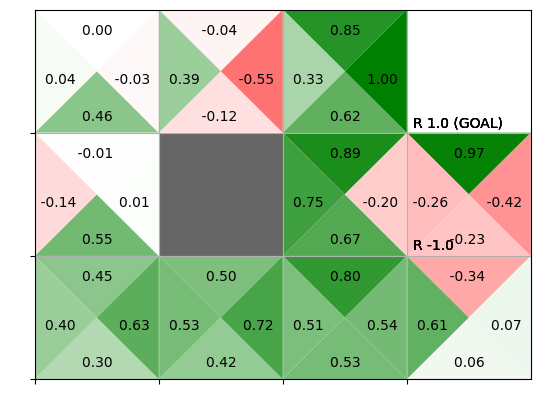

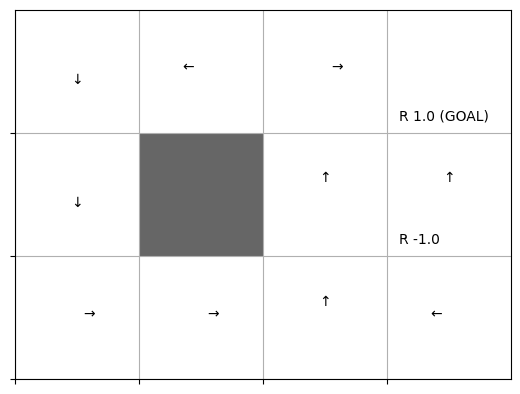

In [3]:
# @title Chap 05.4.2. Code Implementation : Policy Control with Monte Carol Method
from common.gridworld import GridWorld
from collections import defaultdict
import numpy as np

def greedy_probs(Q, state, epsilon = 0, action_size = 4):
    qs = [Q[(state, action)] for action in range(action_size)]
    max_action = np.argmax(qs)

    base_prob = epsilon / action_size
    action_probs = {action: base_prob for action in range(action_size)}
    action_probs[max_action] += (1 - epsilon)
    return action_probs

class McAgent:
    def __init__(self):
        self.gamma = 0.9
        self.action_size = 4
        self.epsilon = 0.1
        self.alpha = 0.1

        random_action = {0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25}
        self.pi = defaultdict(lambda: random_action)
        self.Q = defaultdict(lambda: 0)
        # self.cnts = defaultdict(lambda: 0)
        self.memory = [] # (state, action, reward)

    def get_action(self, state):
        """
        Sampling action with policy
        """
        action_prob = self.pi[state]
        actions = list(action_prob.keys())
        probs = list(action_prob.values())
        action = np.random.choice(actions, p=probs)
        return action

    def add(self, state, action, reward):
        """
        Add (state, action, reward) to memory
        """
        data = (state, action, reward)
        self.memory.append(data)

    def reset(self):
        """
        Reset memory
        """
        self.memory.clear()

    def eval(self):
        G = 0
        for data in reversed(self.memory):
            state, action, reward = data
            G = reward + self.gamma * G
            # self.cnts[state] += 1
            self.V[state] += (G - self.V[state])/self.cnts[state]

    def update(self):
        G = 0
        for data in reversed(self.memory):
            state, action, reward = data
            G = reward + self.gamma * G
            key = (state, action)
            # self.cnts[key] += 1
            alpha = 0.1
            # self.Q[key] += (G - self.Q[key])/self.cnts[key]
            self.Q[key] += (G - self.Q[key])* self.alpha # exponential moving average
            self.pi[state] = greedy_probs(self.Q, state, self.epsilon)


def test_542_1():
    env = GridWorld()
    agent = McAgent()

    episodes = 1000
    for episode in range(episodes):
        state = env.reset() # Rest as the given start point
        agent.reset()       # reset the memory of agent

        while True:
            # Sampling with the providen action probability
            action = agent.get_action(state)
            # Interact with Enviroment
            next_state, reward, done = env.step(action)
            agent.add(state, action, reward)
            if done: # Achive Goal
                # agent.eval() # Evaluate
                agent.update()
                break
            state = next_state

    env.render_q(agent.Q)

if __name__ == "__main__":
    test_542_1()



### Chap 05.5

- On-Policy vs. Off-Policy
    - **On-Policy**
        - The agent learns using the same policy that it is currently following.
        - The policy used to collect data and the policy being improved are the same.
        - Examples: ***SARSA*** (State-Action-Reward-State-Action)
        - Advantage: More stable and often safer, as it learns from its own behavior.
        - Disadvantage: Can be less sample-efficient since it does not use past experiences optimally.

    - **Off-Policy**
        - The agent learns using a different policy than the one used to generate data.
        - The policy being improved is different from the policy used to collect experiences.
        - Examples: ***Q-learning, Deep Q-Networks (DQN)***
        - Advantage: More sample-efficient as it can learn from previously collected data (e.g., replay buffers).
        - Disadvantage: Can be less stable due to divergence between the behavior and target policies.

    - In short, on-policy learning is more stable but can be slower, while off-policy learning is more efficient but may require additional techniques (like experience replay) to stabilize training.


- Traget Policy vs. Behaviour Policy
    - Target Policy
    - Behaviour Policy

-----

### Chap 05.5.2 Importance Sampling for Off-Policy $ $

- $E_{\pi}[x] = \sum x\pi(x) = \sum x\frac{b(x)}{b(x)}\pi(x) = \sum x\frac{\pi(x)}{b(x)}b(x) = E_{b}[x \frac{\pi(x)}{b(x)}]$
    - $ρ(x) = \frac{\pi(x)}{b(x)}$



In [4]:
# @title Chap 05.5.2 Importance Sampling for Off-Policy-Code
import numpy as np

x = np.array([1, 2, 3])
pi = np.array([0.1, 0.1, 0.8])

# Native approach
e = np.sum(x * pi)
print(f"Navtive approach E_pi[x] = {e}")

# Monte Carlo Approach
n = 100
samples = []
for _ in range(n):
    s = np.random.choice(x, p=pi)
    samples.append(s)

mean = np.mean(samples)
var = np.var(samples)
print(f"Monte Carol Method {mean}, variance {var}")


b = np.array([1/3, 1/3, 1/3])
n = 100
samples = []
for _ in range(n):
    idx = np.arange(len(b))
    i = np.random.choice(idx, p=b)
    s = x[i]
    rho = pi[i] / b[i]
    samples.append(rho * s)

mean = np.mean(samples)
var = np.var(samples)
print(f"Important Sampling - 1 {mean:0.2f}, variance {var:0.2f}")
print(f"pi : {pi}")
print(f"b  : {b}")

b = np.array([0.2, 0.2, 0.6])
n = 100
samples = []
for _ in range(n):
    idx = np.arange(len(b))
    i = np.random.choice(idx, p=b)
    s = x[i]
    rho = pi[i] / b[i]
    samples.append(rho * s)

mean = np.mean(samples)
var = np.var(samples)

print(f"Important Sampling - 2 {mean:0.2f}, variance {var:0.2f}")
print(f"pi : {pi}")
print(f"b  : {b}")


Navtive approach E_pi[x] = 2.7
Monte Carol Method 2.76, variance 0.3624
Important Sampling - 1 3.14, variance 10.98
pi : [0.1 0.1 0.8]
b  : [0.33333333 0.33333333 0.33333333]
Important Sampling - 2 2.82, variance 2.50
pi : [0.1 0.1 0.8]
b  : [0.2 0.2 0.6]
